# Maps of SF Street Trees and Equity Priority Communities
## By: Caleb Huang

In [76]:
# import pandas
import pandas as pd 
import geopandas as gpd
import plotly.express as px

In [77]:
# creating the dataframe 
df = pd.read_csv('Data/Street_Tree_List.csv')

In [78]:
# looking at the amount of rows and columns
df.shape

(198393, 24)

In [79]:
# looking at the top 5 rows
df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,DBH,PlotSize,PermitNotes,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old),Analysis Neighborhoods
0,225873,DPW Maintained,Koelreuteria bipinnata :: Chinese Flame Tree,822 Alabama St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,12.0,Width 3ft,NaN,6.009091e+06,2.104279e+06,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)",2.0,4.0,7.0,28859.0,19.0,20.0
1,133842,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,8.0,Width 4ft,NaN,5.999256e+06,2.115022e+06,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)",13.0,6.0,1.0,29490.0,31.0,31.0
2,3119,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,12.0,3X3,NaN,5.999211e+06,2.115015e+06,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)",13.0,6.0,1.0,29490.0,31.0,31.0
3,3120,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,6.0,3X3,NaN,5.999194e+06,2.115012e+06,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)",13.0,6.0,1.0,29490.0,31.0,31.0
4,272733,DPW Maintained,Fraxinus uhdei :: Shamel Ash: Evergreen Ash,590 Masonic Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,NaN,Width 0ft,NaN,5.999164e+06,2.110904e+06,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)",15.0,5.0,11.0,29492.0,16.0,18.0


In [80]:
# Loading all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [81]:
# looking at all the columns
df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,DBH,PlotSize,PermitNotes,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old),Analysis Neighborhoods
0,225873,DPW Maintained,Koelreuteria bipinnata :: Chinese Flame Tree,822 Alabama St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,12.0,Width 3ft,NaN,6.009091e+06,2.104279e+06,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)",2.0,4.0,7.0,28859.0,19.0,20.0
1,133842,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,8.0,Width 4ft,NaN,5.999256e+06,2.115022e+06,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)",13.0,6.0,1.0,29490.0,31.0,31.0
2,3119,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,12.0,3X3,NaN,5.999211e+06,2.115015e+06,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)",13.0,6.0,1.0,29490.0,31.0,31.0
3,3120,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,6.0,3X3,NaN,5.999194e+06,2.115012e+06,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)",13.0,6.0,1.0,29490.0,31.0,31.0
4,272733,DPW Maintained,Fraxinus uhdei :: Shamel Ash: Evergreen Ash,590 Masonic Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,NaN,Width 0ft,NaN,5.999164e+06,2.110904e+06,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)",15.0,5.0,11.0,29492.0,16.0,18.0


In [82]:
# See details for the dataframe
df.info (verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198393 entries, 0 to 198392
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   TreeID                     198393 non-null  int64  
 1   qLegalStatus               198336 non-null  object 
 2   qSpecies                   198393 non-null  object 
 3   qAddress                   196901 non-null  object 
 4   SiteOrder                  196561 non-null  float64
 5   qSiteInfo                  198393 non-null  object 
 6   PlantType                  198393 non-null  object 
 7   qCaretaker                 198393 non-null  object 
 8   qCareAssistant             25449 non-null   object 
 9   PlantDate                  72044 non-null   object 
 10  DBH                        153804 non-null  float64
 11  PlotSize                   147832 non-null  object 
 12  PermitNotes                54298 non-null   object 
 13  XCoord                     19

In [83]:
# sorting out the columns I need
tree_columns = ['TreeID',
               'qSpecies',
               'qAddress',
               'PlotSize',
                'Latitude',
                'Longitude',
               'Location',
               'Analysis Neighborhoods']
# creating a new dataframe with new columns
df2 = df[tree_columns]

In [84]:
# Checking my work
df2.sample(1)

,TreeID,qSpecies,qAddress,PlotSize,Latitude,Longitude,Location,Analysis Neighborhoods
168024,86431,Tristaniopsis laurina :: Swamp Myrtle,2555 26th Ave,3x3,37.739843,-122.48307,"(37.73984339892619, -122.48306994950522)",35.0


In [85]:
# renaming the columns
df2.columns = ['Tree ID',
'Species',
'Tree Address',
'Plot Size',
'Latitude',
'Longitude',
'Location',
'Neighborhood']

In [86]:
df2.head()

,Tree ID,Species,Tree Address,Plot Size,Latitude,Longitude,Location,Neighborhood
0,225873,Koelreuteria bipinnata :: Chinese Flame Tree,822 Alabama St,Width 3ft,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)",20.0
1,133842,Platanus x hispanica :: Sycamore: London Plane,3170 California St,Width 4ft,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)",31.0
2,3119,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3X3,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)",31.0
3,3120,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3X3,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)",31.0
4,272733,Fraxinus uhdei :: Shamel Ash: Evergreen Ash,590 Masonic Ave,Width 0ft,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)",18.0


In [87]:
# counting the amount of trees in each neighborhood
df2['Neighborhood'].value_counts()

Neighborhood
20.0    16175
41.0    15569
1.0     13599
35.0    12552
22.0     9055
2.0      8908
5.0      8055
29.0     6915
30.0     6604
8.0      6540
14.0     6451
39.0     6063
9.0      5726
26.0     5700
3.0      5375
34.0     5159
7.0      4899
13.0     4821
24.0     4257
10.0     3908
31.0     3776
11.0     3775
28.0     3748
18.0     3304
23.0     3192
32.0     3188
4.0      2905
21.0     2683
25.0     2622
36.0     2429
33.0     1477
40.0     1439
15.0     1249
6.0      1039
16.0      935
38.0      726
19.0      200
27.0      111
12.0       97
17.0       22
37.0        8
Name: count, dtype: int64

In [88]:
# creating a variable for tree count
neighborhood_tree_count = df2['Neighborhood'].value_counts()

In [89]:
# converting series into a dataframe
neighborhood_tree_count = neighborhood_tree_count.reset_index()
neighborhood_tree_count

,Neighborhood,count
0,20.0,16175
1,41.0,15569
2,1.0,13599
3,35.0,12552
4,22.0,9055
5,2.0,8908
6,5.0,8055
7,29.0,6915
8,30.0,6604
9,8.0,6540


In [90]:
# renaming columns
neighborhood_tree_count.columns = ['Neighborhood', 'Tree Count']
neighborhood_tree_count

,Neighborhood,Tree Count
0,20.0,16175
1,41.0,15569
2,1.0,13599
3,35.0,12552
4,22.0,9055
5,2.0,8908
6,5.0,8055
7,29.0,6915
8,30.0,6604
9,8.0,6540


<Axes: title={'center': 'Number of Trees in Neighborhoods'}, xlabel='Neighborhood'>

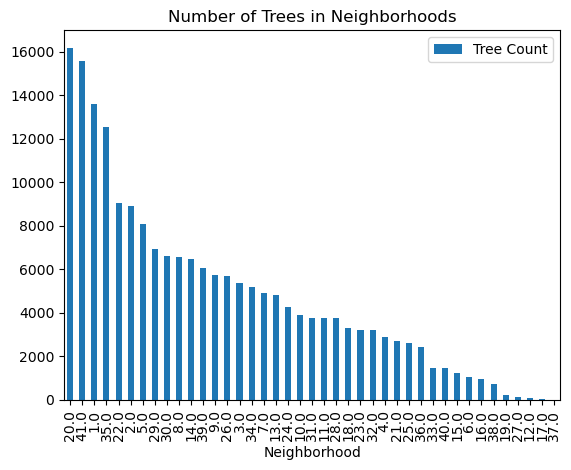

In [91]:
# showing neighborhood tree count on a bar graph
neighborhood_tree_count.plot.bar(x = 'Neighborhood', y = 'Tree Count', title = 'Number of Trees in Neighborhoods')

In [92]:
sf_epcs=gpd.read_file("Data/SF EPCs/SF_EPCs_2021.shp")
sf_epcs.head()

,geoid,state_fip,county_fip,tract,block_grou,tot_pop,pop_minori,pct_minori,tot_pop_se,pop_over75,pct_over75,tot_fam,pop_spfam,pct_spfam,tot_pop_ov,pop_lep,pct_lep,tot_pop_po,pop_below2,pct_below2,tot_pop_ci,pop_disabi,pct_disab,tot_hh,pop_zvhhs,pct_zvhhs,pop_hus_re,pct_hus_re,geometry
0,06075010700,06,075,010700,NA,5522,4792,0.867802,5522,871,0.157733,1378,121,0.087808,5370.0,3078.0,0.573184,5522,3170,0.574067,5522.0,788.0,0.142702,2491.0,1829.0,0.734243,527,0.211562,"POLYGON ((-122.41291 37.80218, -122.41138 37.8..."
1,06075012401,06,075,012401,NA,4782,3424,0.716018,4782,166,0.034714,725,110,0.151724,4521.0,785.0,0.173634,4782,2284,0.477624,4782.0,1021.0,0.213509,2749.0,2138.0,0.777737,878,0.319389,"POLYGON ((-122.41771 37.78424, -122.41607 37.7..."
2,06075010600,06,075,010600,NA,3356,2107,0.627831,3356,425,0.126639,673,34,0.050520,3335.0,1012.0,0.303448,3356,1388,0.413588,3343.0,488.0,0.145977,1797.0,1248.0,0.694491,264,0.146912,"POLYGON ((-122.41102 37.80117, -122.40777 37.8..."
3,06075011300,06,075,011300,NA,3046,2585,0.848654,3046,737,0.241957,675,83,0.122963,2927.0,1429.0,0.488213,3010,1434,0.476412,3046.0,745.0,0.244583,1546.0,1188.0,0.768435,332,0.214748,"POLYGON ((-122.41172 37.79629, -122.40843 37.7..."
4,06075011800,06,075,011800,NA,1477,1338,0.905890,1477,250,0.169262,370,37,0.100000,1426.0,710.0,0.497896,1477,780,0.528097,1477.0,204.0,0.138118,735.0,605.0,0.823129,173,0.235374,"POLYGON ((-122.4079 37.79406, -122.4048 37.794..."


<Axes: >

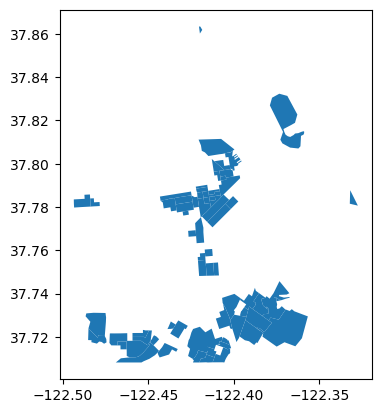

In [93]:
sf_epcs.plot()

In [94]:
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.Longitude, df2.Latitude),crs=4326)

In [95]:
# creating a spatial join
trees_per_tract = gpd.sjoin(sf_epcs, gdf)

In [96]:
# creating a count per EPC tract
tree_counts = trees_per_tract.value_counts('tract').reset_index(name='tree_count')
tree_counts

,tract,tree_count
0,023102,2137
1,010100,1802
2,017802,1575
3,020100,1573
4,017601,1509
5,016100,1507
6,015801,1506
7,061200,1331
8,023200,1263
9,015500,1248


In [97]:
# merging trees to EPC neighborhood
neighborhoodtrees = sf_epcs.merge(tree_counts, how='left',on='tract')

In [98]:
# checking my work
neighborhoodtrees.sample()

,geoid,state_fip,county_fip,tract,block_grou,tot_pop,pop_minori,pct_minori,tot_pop_se,pop_over75,pct_over75,tot_fam,pop_spfam,pct_spfam,tot_pop_ov,pop_lep,pct_lep,tot_pop_po,pop_below2,pct_below2,tot_pop_ci,pop_disabi,pct_disab,tot_hh,pop_zvhhs,pct_zvhhs,pop_hus_re,pct_hus_re,geometry,tree_count
51,060750312011,06,075,031201,1,3321,2728,0.821439,3321,162,0.04878,575,103,0.17913,0.0,0.0,0.208966,3321,1000,0.301114,0.0,0.0,0.082006,0.0,0.0,0.222865,172,0.137482,"POLYGON ((-122.45921 37.72184, -122.45818 37.7...",307


In [99]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Trees by EPC Neighborhood in SF')

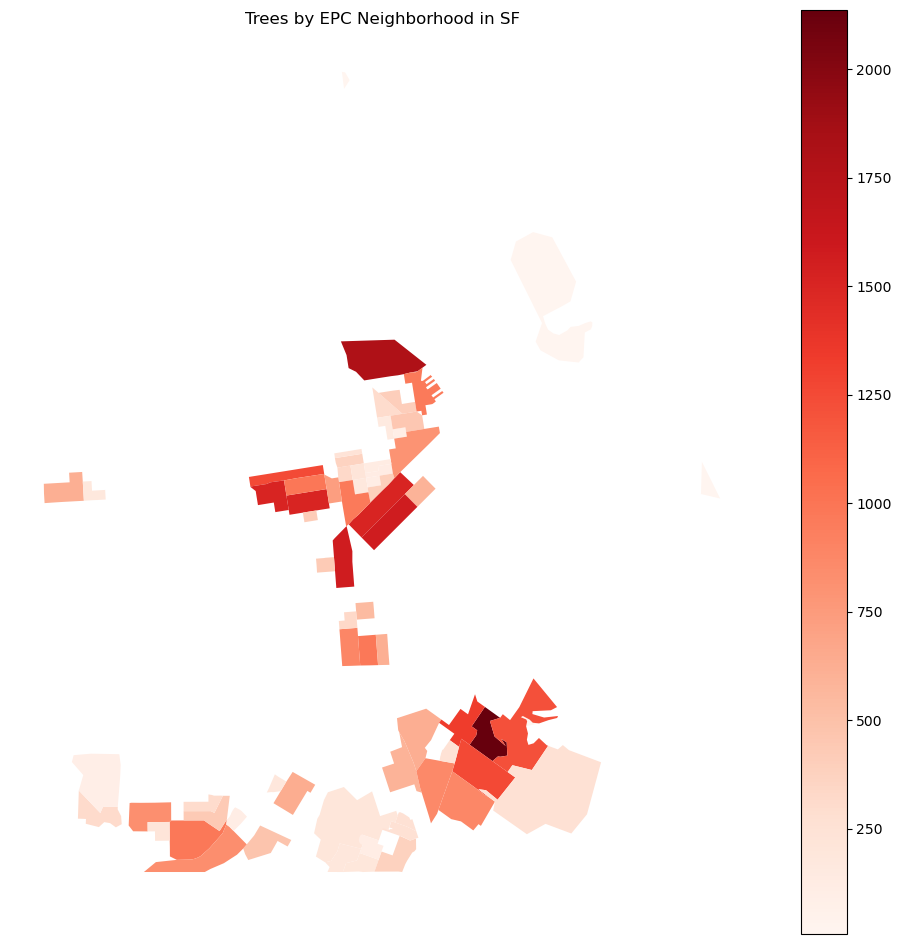

In [101]:
# plot trees per Equity Priority Community
fig,ax = plt.subplots(figsize=(12,12))

neighborhoodtrees.plot(ax=ax,column='tree_count',legend=True,cmap='Reds')

ax.axis('off')

# add title
ax.set_title('Trees by EPC Neighborhood in SF')